<a href="https://colab.research.google.com/github/KhuzaimahAziz/TU-Dortmund-Cycle-Count-Analysis/blob/main/TU_Dort_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd

In [143]:
df=pd.read_excel('/content/drive/MyDrive/Seperate_cyclist_counts (1).xlsx')

In [231]:
df['Time']=df['Time'].astype('str')

In [144]:
df['Date']=pd.to_datetime(df.Date)

<ipython-input-144-bacdeb16f316>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df.Date)


In [145]:
df.dropna(inplace=True)

In [146]:
df['Days of the week']=df['Date'].dt.day_name()

In [147]:
df['Days of the week'].unique()

array(['Friday', 'Monday', 'Thursday', 'Saturday', 'Tuesday', 'Sunday',
       'Wednesday'], dtype=object)

In [148]:
df.describe()

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
count,35036.000000,35036.000000,35036.000000,35036.000000
mean,5.873587,6.990096,15.848527,10.300862
std,8.128066,10.551716,16.700837,11.625587
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000
50%,3.000000,3.000000,10.000000,6.000000
75%,9.000000,9.000000,26.000000,16.000000
max,107.000000,134.000000,109.000000,193.000000


In [149]:
df.columns

Index(['Date', 'Time', 'fleher deich ost stromaufwaerts',
       'fleher deich west stromabwaerts', 'okb nord', 'okb sued',
       'Days of the week'],
      dtype='object')

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/05/'+year),
               'summer': pd.date_range(start='21/05/'+year, end='22/08/'+year),
               'autumn': pd.date_range(start='23/08/'+year, end='20/11/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
df['season'] = df.Date.map(season_of_date)

<ipython-input-151-665f56b81530>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/05/'+year),
<ipython-input-151-665f56b81530>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'summer': pd.date_range(start='21/05/'+year, end='22/08/'+year),
<ipython-input-151-665f56b81530>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'autumn': pd.date_range(start='23/08/'+year, end='20/11/'+year)}


In [152]:


winter_season=df[df['season']=='winter']

In [153]:
winter_count=winter_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([winter_season.Date.dt.month_name()]).agg('sum')
winter_count

<ipython-input-153-7e36eaec9213>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  winter_count=winter_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([winter_season.Date.dt.month_name()]).agg('sum')


,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
Date,,,,
December,11792.0,12854.0,37159.0,24468.0
February,17816.0,22294.0,40759.0,24881.0
January,13241.0,16125.0,34321.0,23451.0
March,9143.0,11262.0,25219.0,16955.0
November,3272.0,3198.0,11371.0,8065.0


In [154]:
summer_season=df[df['season']=='summer']
spring_season=df[df['season']=='spring']
autumn_season=df[df['season']=='autumn']

In [155]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [156]:
summer_count=summer_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([summer_season.Date.dt.month_name()]).agg('sum')
spring_count=spring_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([spring_season.Date.dt.month_name()]).agg('sum')
autumn_count=autumn_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([autumn_season.Date.dt.month_name()]).agg('sum')


<ipython-input-156-6214420131b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summer_count=summer_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([summer_season.Date.dt.month_name()]).agg('sum')
<ipython-input-156-6214420131b4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spring_count=spring_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([spring_season.Date.dt.month_name()]).agg('sum')
<ipython-input-156-6214420131b4>:3: FutureWarning: The d

In [157]:
summer=summer_count.sum()
winter=winter_count.sum()
autumn=autumn_count.sum()
spring=spring_count.sum()

<ipython-input-158-cd9e215f1f6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_sum=summer_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(summer_season['Days of the week']).agg('sum').reindex(cats).plot(kind='bar',figsize=(11,9))
<ipython-input-158-cd9e215f1f6b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_win=winter_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(winter_season['Days of the week']).agg('sum').reindex(cats).plot(kind=

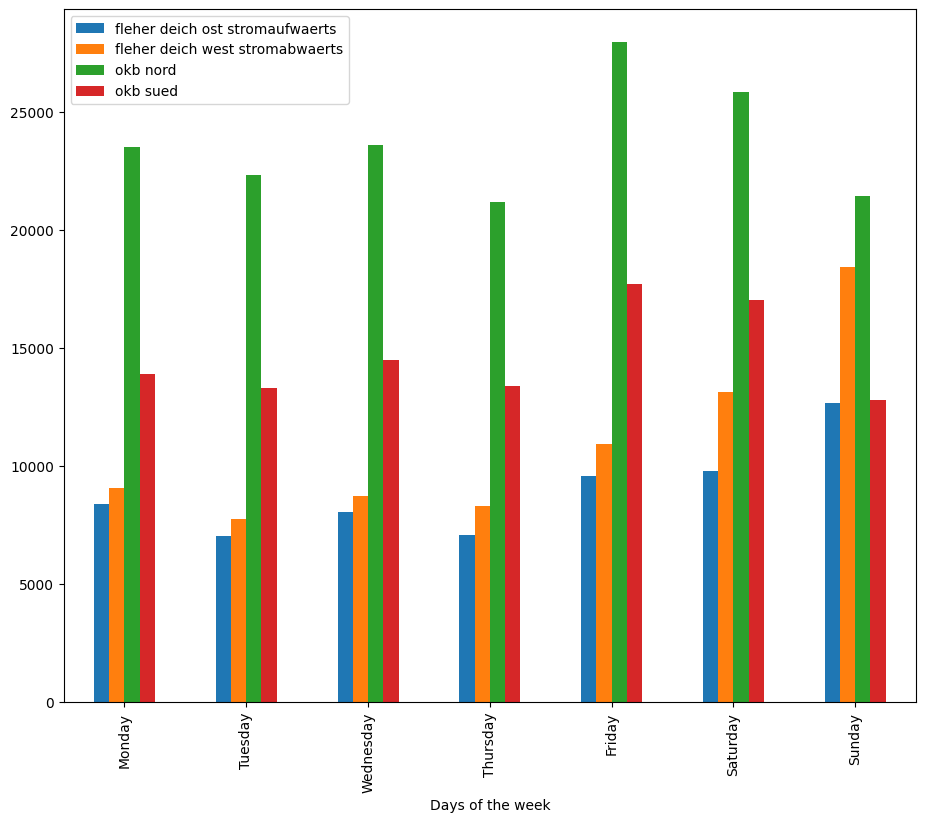

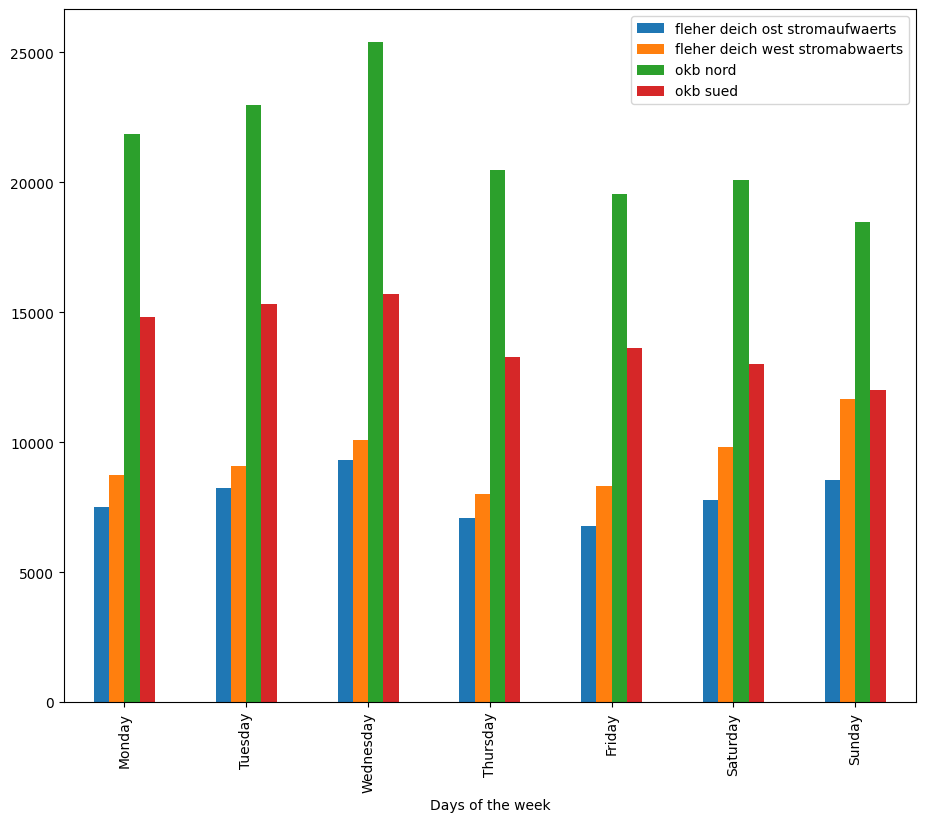

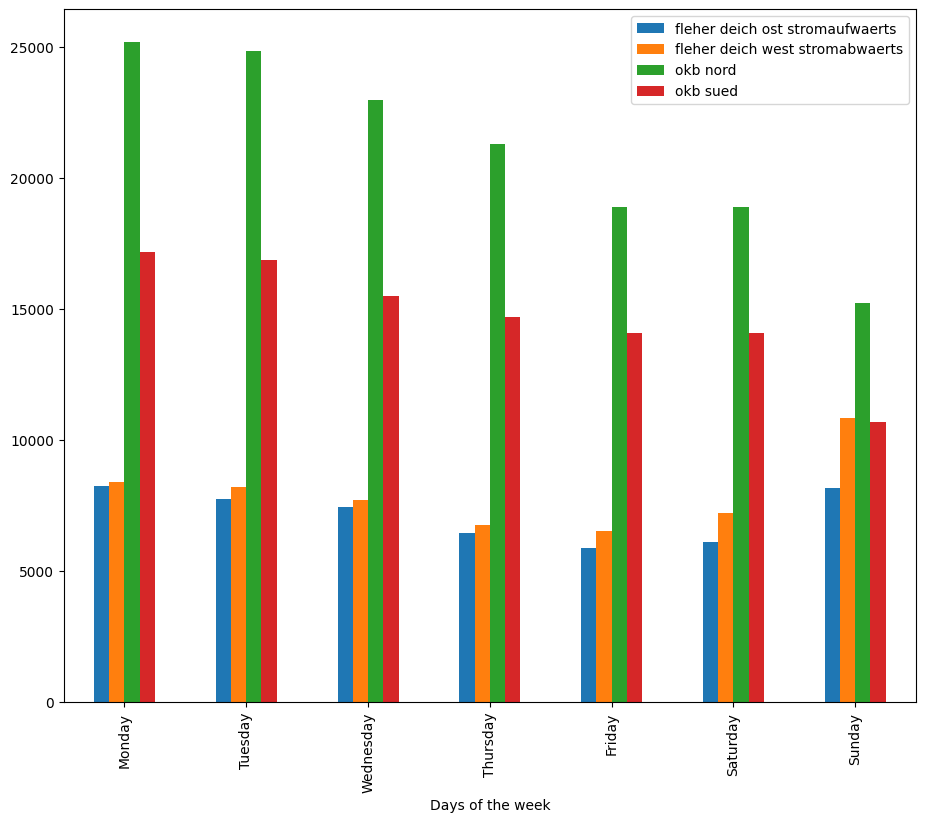

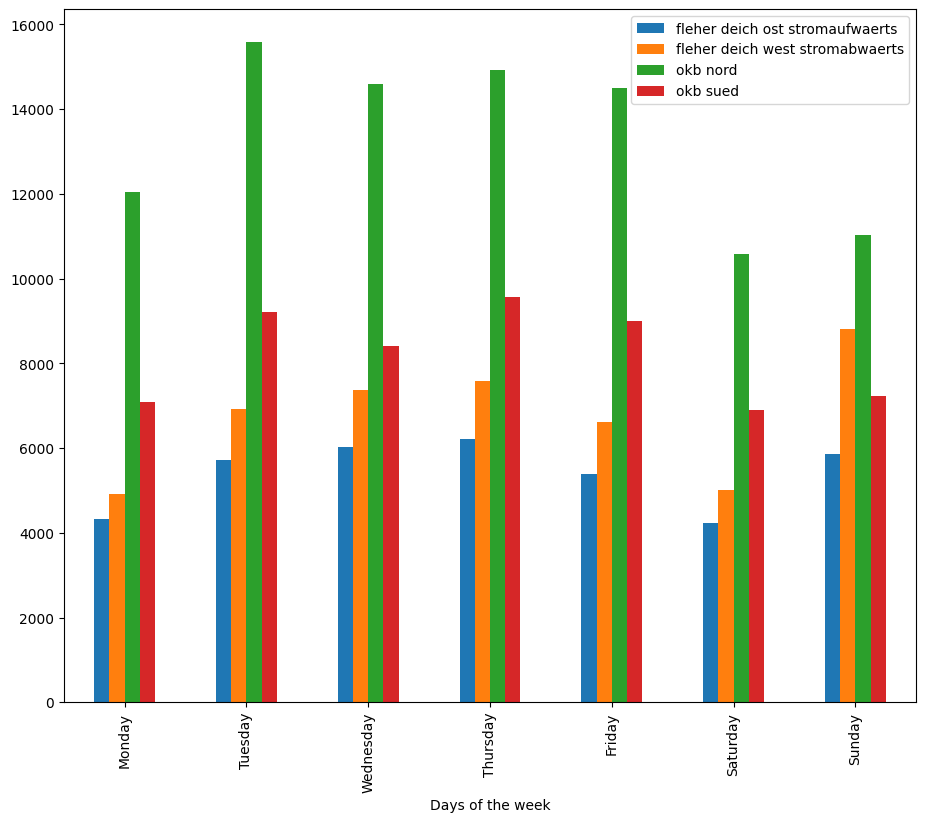

In [158]:
plot_sum=summer_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(summer_season['Days of the week']).agg('sum').reindex(cats).plot(kind='bar',figsize=(11,9))
plot_win=winter_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(winter_season['Days of the week']).agg('sum').reindex(cats).plot(kind='bar',figsize=(11,9))
plot_aut=autumn_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(autumn_season['Days of the week']).agg('sum').reindex(cats).plot(kind='bar',figsize=(11,9))
plot_spring=spring_season[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby(spring_season['Days of the week']).agg('sum').reindex(cats).plot(kind='bar',figsize=(11,9))

In [159]:
seasonal_=pd.DataFrame(data=dict(Summer=summer, Winter=winter, Autumn=autumn, Spring=spring), index=summer.index).transpose()

In [160]:
seasonal_.reset_index(inplace=True)

In [161]:
seasonal_['index'].values

array(['Summer', 'Winter', 'Autumn', 'Spring'], dtype=object)

In [162]:
seasonal_

,index,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
0,Summer,62649.0,76276.0,165814.0,102551.0
1,Winter,55264.0,65733.0,148829.0,97820.0
2,Autumn,50095.0,55680.0,147371.0,103125.0
3,Spring,37779.0,47216.0,93255.0,57405.0


In [163]:
flde=seasonal_[['index','fleher deich ost stromaufwaerts']]

In [164]:
flde

,index,fleher deich ost stromaufwaerts
0,Summer,62649.0
1,Winter,55264.0
2,Autumn,50095.0
3,Spring,37779.0


In [165]:
flhe=seasonal_[['index','fleher deich west stromabwaerts']]

In [166]:
nord=seasonal_[['index','okb nord']]
sued=seasonal_[['index','okb sued']]

In [167]:
import numpy as np
x_axis=['Summer', 'Winter', 'Autumn', 'Spring']
X_axis = np.arange(len(x_axis))

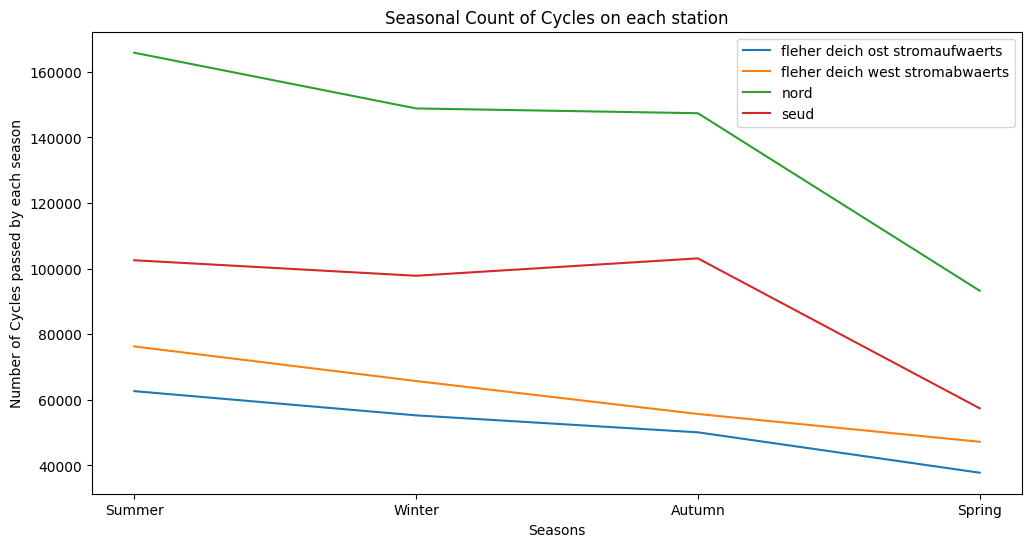

In [168]:
plt.figure(figsize=(12,6))
plt.plot(x_axis, flde['fleher deich ost stromaufwaerts'], label='fleher deich ost stromaufwaerts')
plt.plot(x_axis, flhe['fleher deich west stromabwaerts'], label='fleher deich west stromabwaerts')
plt.plot(x_axis, nord['okb nord'], label='nord')
plt.plot(x_axis, sued['okb sued'], label='seud')
plt.ylabel('Number of Cycles passed by each season')
plt.xlabel('Seasons')
plt.title('Seasonal Count of Cycles on each station')
plt.legend()
plt.savefig('Seasonal_Count.png')

In [169]:
flde

,index,fleher deich ost stromaufwaerts
0,Summer,62649.0
1,Winter,55264.0
2,Autumn,50095.0
3,Spring,37779.0


In [170]:
autumn_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 768 to 33119
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             8640 non-null   datetime64[ns]
 1   Time                             8640 non-null   object        
 2   fleher deich ost stromaufwaerts  8640 non-null   float64       
 3   fleher deich west stromabwaerts  8640 non-null   float64       
 4   okb nord                         8640 non-null   float64       
 5   okb sued                         8640 non-null   float64       
 6   Days of the week                 8640 non-null   object        
 7   season                           8640 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 607.5+ KB


In [171]:
sep=autumn_season[(autumn_season['Date']=='2021-11-01') & (autumn_season['Days of the week']== 'Monday')]

In [172]:
sep.set_index('Time',inplace=True)

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='Time'>

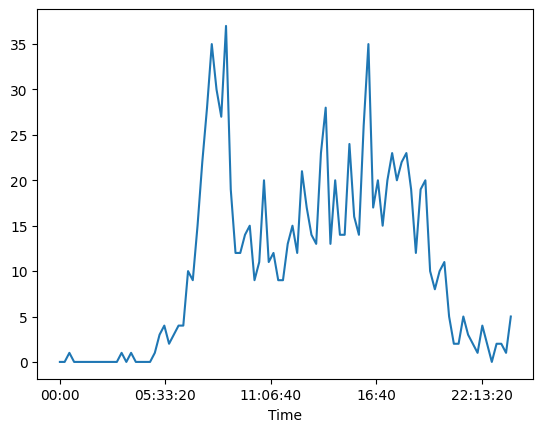

In [174]:
sep['okb nord'].plot()

In [175]:
week_data=autumn_season[autumn_season['Date'].isin(pd.date_range('2021-09-01', '2021-09-07'))]

In [176]:
flde.set_index('index',inplace=True)

In [177]:
result=seasonal_decompose(sep['okb nord'], model='additive', period=24)

<Axes: xlabel='Time'>

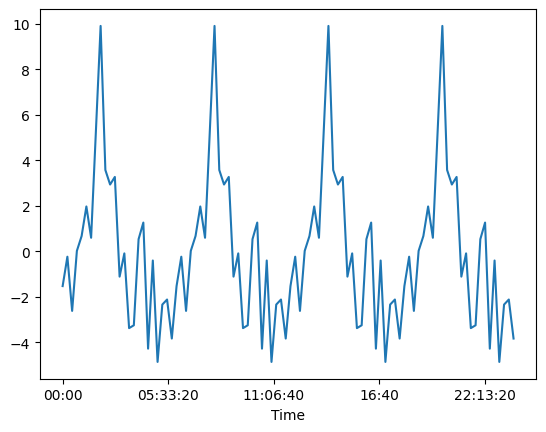

In [178]:
result.seasonal.plot()

In [179]:
from statsmodels.tsa.seasonal import STL

In [180]:
stl = STL(sep['okb nord'], period=24)
res=stl.fit()

<Axes: xlabel='Time'>

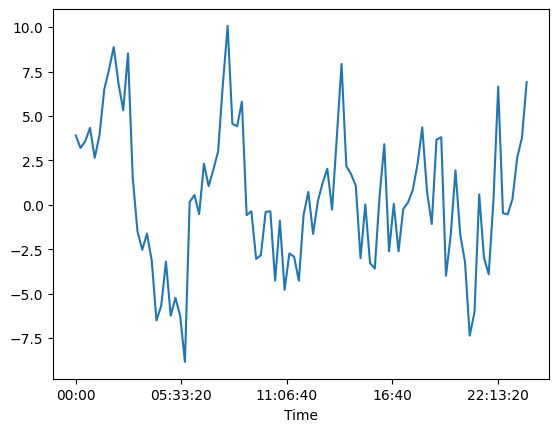

In [181]:
res.seasonal.plot()

In [182]:
sep=autumn_season[autumn_season['Date'].isin(pd.date_range('2021-09-01','2021-11-30'))]

In [183]:
sep

,Date,Time,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued,Days of the week,season
768,2021-09-01,00:00:00,0.0,1.0,1.0,0.0,Wednesday,autumn
769,2021-09-01,00:15:00,0.0,0.0,0.0,0.0,Wednesday,autumn
770,2021-09-01,00:30:00,0.0,0.0,4.0,0.0,Wednesday,autumn
771,2021-09-01,00:45:00,0.0,1.0,0.0,1.0,Wednesday,autumn
772,2021-09-01,01:00:00,0.0,0.0,2.0,0.0,Wednesday,autumn
...,...,...,...,...,...,...,...,...
33115,2021-11-12,22:45:00,0.0,0.0,5.0,8.0,Friday,autumn
33116,2021-11-12,23:00:00,1.0,3.0,4.0,6.0,Friday,autumn
33117,2021-11-12,23:15:00,1.0,0.0,5.0,1.0,Friday,autumn
33118,2021-11-12,23:30:00,0.0,0.0,1.0,2.0,Friday,autumn


In [184]:
yearly_count=sep[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([sep.Date.dt.day_name()]).agg('sum')

<ipython-input-184-ee3c98285e98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_count=sep[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([sep.Date.dt.day_name()]).agg('sum')


In [185]:
yearly_count

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
Date,,,,
Friday,5471.0,6145.0,17458.0,12919.0
Monday,6890.0,7077.0,20857.0,14255.0
Saturday,5891.0,6983.0,18121.0,13512.0
Sunday,8007.0,10652.0,14847.0,10369.0
Thursday,5928.0,6247.0,19440.0,13365.0
Tuesday,5767.0,6074.0,19342.0,13103.0
Wednesday,6254.0,6488.0,19897.0,13360.0


In [186]:
yearly_count

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
Date,,,,
Friday,5471.0,6145.0,17458.0,12919.0
Monday,6890.0,7077.0,20857.0,14255.0
Saturday,5891.0,6983.0,18121.0,13512.0
Sunday,8007.0,10652.0,14847.0,10369.0
Thursday,5928.0,6247.0,19440.0,13365.0
Tuesday,5767.0,6074.0,19342.0,13103.0
Wednesday,6254.0,6488.0,19897.0,13360.0


In [187]:
from statsmodels.graphics.tsaplots import plot_acf

In [188]:
sep.set_index('Time',inplace=True)

In [189]:
sep

,Date,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued,Days of the week,season
Time,,,,,,,
00:00:00,2021-09-01,0.0,1.0,1.0,0.0,Wednesday,autumn
00:15:00,2021-09-01,0.0,0.0,0.0,0.0,Wednesday,autumn
00:30:00,2021-09-01,0.0,0.0,4.0,0.0,Wednesday,autumn
00:45:00,2021-09-01,0.0,1.0,0.0,1.0,Wednesday,autumn
01:00:00,2021-09-01,0.0,0.0,2.0,0.0,Wednesday,autumn
...,...,...,...,...,...,...,...
22:45:00,2021-11-12,0.0,0.0,5.0,8.0,Friday,autumn
23:00:00,2021-11-12,1.0,3.0,4.0,6.0,Friday,autumn
23:15:00,2021-11-12,1.0,0.0,5.0,1.0,Friday,autumn


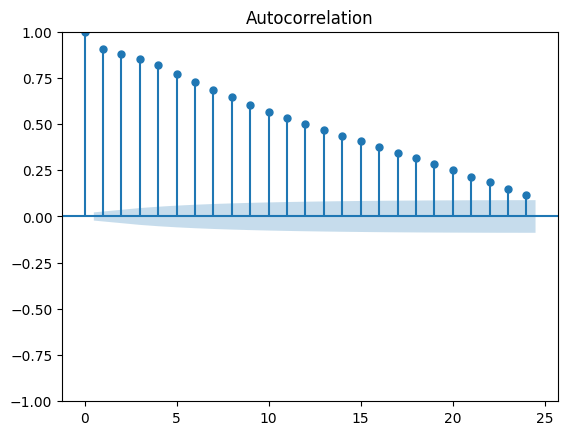

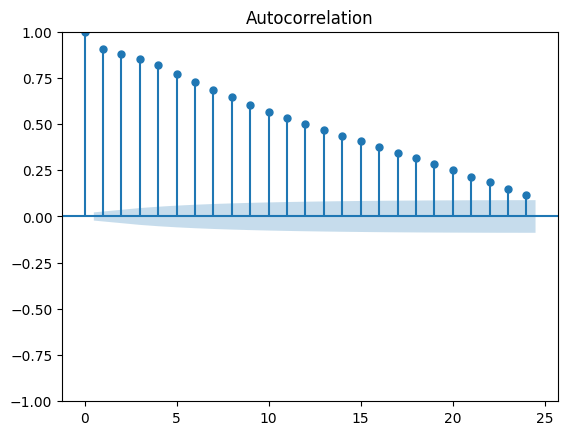

In [190]:
plot_acf(sep['okb nord'], lags=24)

In [191]:
def plotseasonal(res, axes, station_name):
    res.trend.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Trend')
    axes[0].title.set_text(station_name)
    res.seasonal.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Seasonal')


In [192]:
def data_prep(start_date:str, end_date: str, station_name: str, period: int):
  data=df[df['Date'].isin(pd.date_range(start_date,end_date))]
  data.set_index('Time',inplace=True)
  res=seasonal_decompose(data[station_name],model='additive',period=period)
  return res

In [193]:
winter_season.set_index('Time',inplace=True)

In [194]:
winter_ost=seasonal_decompose(winter_season['fleher deich ost stromaufwaerts'], period=24)
winter_west=seasonal_decompose(winter_season['fleher deich west stromabwaerts'], period=24)
winter_nord=seasonal_decompose(winter_season['okb nord'], period=24)
winter_sued=seasonal_decompose(winter_season['okb sued'], period=24)

In [195]:
spring_ost=data_prep('2021-01-01','2021-5-31', 'fleher deich ost stromaufwaerts', period=24)
spring_west=data_prep('2021-03-01','2021-5-31', 'fleher deich west stromabwaerts', period=24)
spring_nord=data_prep('2021-03-01','2021-5-31', 'okb nord', period=24)
spring_sued=data_prep('2021-03-01','2021-5-31', 'okb sued', period=24)

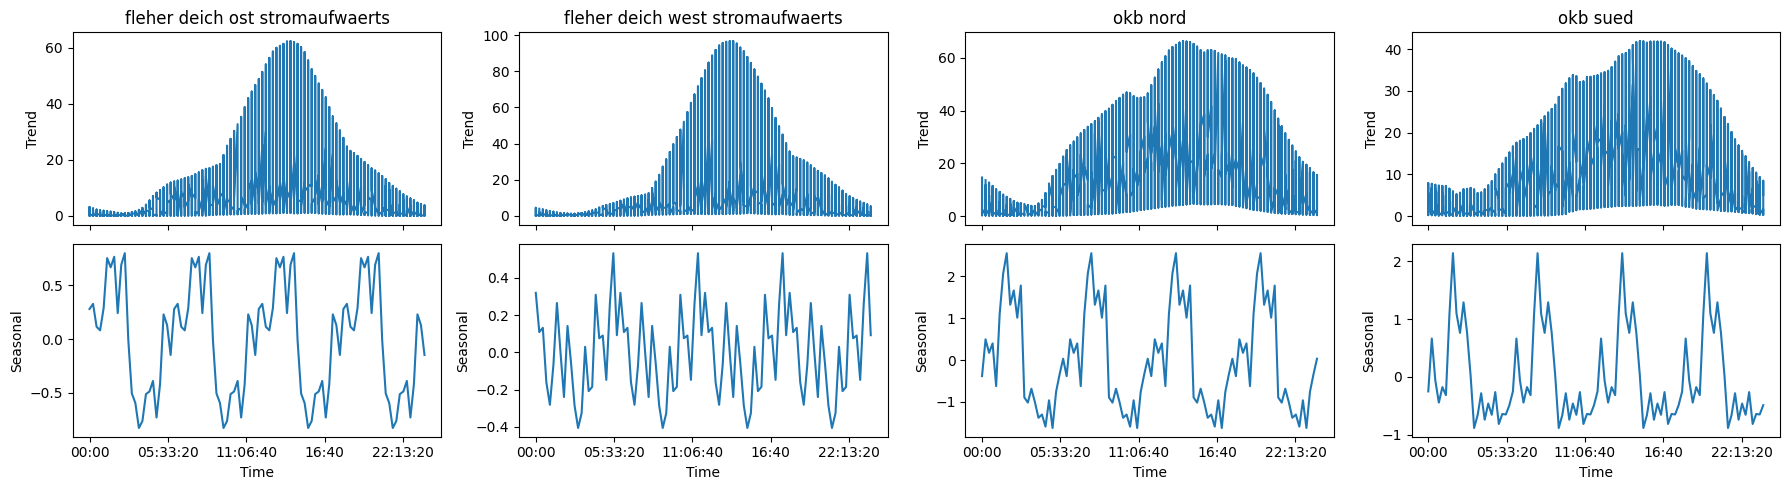

In [196]:
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=True, figsize=(18,5))
plotseasonal(winter_ost, axes[:, 0],'fleher deich ost stromaufwaerts')
plotseasonal(winter_west, axes[:,1],'fleher deich west stromaufwaerts')
plotseasonal(winter_nord, axes[:,2],'okb nord')
plotseasonal(winter_sued, axes[:,3],'okb sued')
plt.tight_layout()
plt.savefig('Winter_Count.png')
plt.show()

In [233]:
df2=df[(df['Time']=='07:45:00') | (df['Time']=='08:00:00')]

In [234]:
df['month']=pd.DatetimeIndex(df['Date']).month_name()

In [235]:
df2

,Date,Time,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued,Days of the week,season,month
31,2021-01-01,07:45:00,0.0,0.0,0.0,0.0,Friday,winter,January
32,2021-01-01,08:00:00,0.0,0.0,0.0,2.0,Friday,winter,January
127,2021-02-01,07:45:00,1.0,0.0,4.0,0.0,Monday,winter,February
128,2021-02-01,08:00:00,1.0,0.0,2.0,1.0,Monday,winter,February
223,2021-03-01,07:45:00,2.0,0.0,2.0,12.0,Monday,winter,March
...,...,...,...,...,...,...,...,...,...
34784,2021-12-29,08:00:00,7.0,0.0,10.0,4.0,Wednesday,winter,December
34879,2021-12-30,07:45:00,3.0,0.0,7.0,2.0,Thursday,winter,December
34880,2021-12-30,08:00:00,4.0,1.0,9.0,1.0,Thursday,winter,December
34975,2021-12-31,07:45:00,0.0,1.0,6.0,1.0,Friday,winter,December


In [236]:
from scipy.stats import chi2_contingency, chisquare
import statsmodels.api as sm

In [237]:
column='fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued'

In [246]:
contingency_table=df2[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([df2.Date.dt.month_name()]).agg('sum')

<ipython-input-246-7067b4c2b6aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  contingency_table=df2[['fleher deich ost stromaufwaerts','fleher deich west stromabwaerts', 'okb nord', 'okb sued','Days of the week']].groupby([df2.Date.dt.month_name()]).agg('sum')


In [239]:
contingency_table.reset_index(inplace=True)

In [204]:
contingency_table.to_csv('Cycle_Count_yearly.csv')

In [205]:
monthly_totals=contingency_table.sum()

In [206]:
from scipy.stats import chi2_contingency

results = []
for station in contingency_table.columns:
    observed = monthly_totals
    monthly_proportions = monthly_totals / monthly_totals.sum()
    expected = monthly_proportions * contingency_table[station].sum()
    _,p,_,_= chi2_contingency([observed, expected])
    results.append({'Station': station, 'p-value': p})



In [207]:
results

[{'Station': 'Date', 'p-value': nan},
 {'Station': 'fleher deich ost stromaufwaerts', 'p-value': nan},
 {'Station': 'fleher deich west stromabwaerts', 'p-value': nan},
 {'Station': 'okb nord', 'p-value': nan},
 {'Station': 'okb sued', 'p-value': nan}]

In [208]:
alpha = 0.05  # Significance level
adjusted_alpha = alpha / len(results)
for result in results:
    result['Adjusted p-value'] = result['p-value'] * len(results)
    result['Significant'] = result['Adjusted p-value'] < alpha

In [209]:
differing_stations = [result['Station'] for result in results if result['Significant']]


In [210]:
for result in results:
    print(f"Station: {result['Station']}")
    print(f"p-value: {result['p-value']:.4f}")
    print(f"Adjusted p-value: {result['Adjusted p-value']:.4f}")
    print(f"Significant: {result['Significant']}")
    print()

print("Counting stations that differ:")
print(differing_stations)

Station: Date
p-value: nan
Adjusted p-value: nan
Significant: False

Station: fleher deich ost stromaufwaerts
p-value: nan
Adjusted p-value: nan
Significant: False

Station: fleher deich west stromabwaerts
p-value: nan
Adjusted p-value: nan
Significant: False

Station: okb nord
p-value: nan
Adjusted p-value: nan
Significant: False

Station: okb sued
p-value: nan
Adjusted p-value: nan
Significant: False

Counting stations that differ:
[]


In [211]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [212]:
def perform_anova(data):
    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*data.values.T)
    return f_statistic, p_value


In [213]:
f_stat, p_value = perform_anova(contingency_table)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [214]:
def perform_tukey(data):
    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(data.values.ravel(), data.columns.ravel())
    return tukey_result

In [241]:
contingency_table

,fleher deich ost stromaufwaerts,fleher deich west stromabwaerts,okb nord,okb sued
Date,,,,
April,635.0,400.0,1559.0,1028.0
August,759.0,514.0,2136.0,1605.0
December,454.0,301.0,1213.0,811.0
February,502.0,376.0,1276.0,859.0
January,385.0,303.0,1191.0,847.0
July,622.0,432.0,1449.0,837.0
June,725.0,550.0,2032.0,1362.0
March,550.0,396.0,1378.0,1072.0
May,511.0,388.0,1260.0,827.0


In [242]:
normalized_df=(contingency_table-contingency_table.min())/(contingency_table.max()-contingency_table.min())


In [243]:
contingency_table.reset_index(inplace=True)

In [244]:
cross_tab=pd.crosstab(contingency_table['Date'],contingency_table['fleher deich west stromabwaerts'] )

In [247]:
from itertools import combinations

# Perform pairwise chi-square tests
significant_differences = []
alpha_adjusted = alpha / (len(contingency_table.columns) * (len(contingency_table.columns) - 1) / 2)

for station1, station2 in combinations(contingency_table.columns, 2):
    contingency_table_pair = contingency_table[[station1, station2]]
    chi2, p_value, _, _ = chi2_contingency(contingency_table_pair)

    if p_value < alpha_adjusted:
        significant_differences.append((station1, station2))

# Apply Bonferroni correction to the significance threshold
alpha_corrected = alpha / len(significant_differences) if significant_differences else alpha

# Perform pairwise chi-square tests with corrected significance threshold
significant_differences_corrected = []
for station1, station2 in significant_differences:
    contingency_table_pair = contingency_table[[station1, station2]]
    chi2, p_value, _, _ = chi2_contingency(contingency_table_pair)

    if p_value < alpha_corrected:
        significant_differences_corrected.append((station1, station2))

# Print significant differences
if significant_differences_corrected:
    print("Significant differences were found between the following counting stations (after Bonferroni correction):")
    for station1, station2 in significant_differences_corrected:
        print(f"{station1} and {station2}")
else:
    print("No significant differences were found between the counting stations (after Bonferroni correction).")


Significant differences were found between the following counting stations (after Bonferroni correction):
fleher deich ost stromaufwaerts and fleher deich west stromabwaerts
fleher deich ost stromaufwaerts and okb nord
fleher deich ost stromaufwaerts and okb sued
fleher deich west stromabwaerts and okb nord
fleher deich west stromabwaerts and okb sued
okb nord and okb sued
